In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the identifiers for body and hand parts
BODY_IDENTIFIERS = [
    "nose",
    "neck",
    "rightEye",
    "leftEye",
    "rightEar",
    "leftEar",
    "rightShoulder",
    "leftShoulder",
    "rightElbow",
    "leftElbow",
    "rightWrist",
    "leftWrist"
]

HAND_IDENTIFIERS = [
    "wrist",
    "indexTip",
    "indexDIP",
    "indexPIP",
    "indexMCP",
    "middleTip",
    "middleDIP",
    "middlePIP",
    "middleMCP",
    "ringTip",
    "ringDIP",
    "ringPIP",
    "ringMCP",
    "littleTip",
    "littleDIP",
    "littlePIP",
    "littleMCP",
    "thumbTip",
    "thumbIP",
    "thumbMP",
    "thumbCMC"
]

In [12]:
# Helper function to convert a string to a list and count elements
def count_elements(cell, count_zeros=False):
    if count_zeros: 
        cell_list = eval(cell)
        return sum(1 for value in cell_list if value == 0)
    else:
        return len((eval(cell))) # Assuming the lists are represented as strings

In [5]:
def calculate_and_print_stats(dataframe_path, dataframe=None):
    if dataframe_path == None:
        df = dataframe
    else:
        df = pd.read_csv(dataframe_path)

    # Count the number of rows for each unique label
    label_counts = df['labels'].value_counts()

    label_counts.plot(kind='bar')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title('No. Samples for Each Class')
    plt.show()
    
    # Select columns related to body parts
    body_part_columns = [f"{part}_{coord}" for part in BODY_IDENTIFIERS for coord in ["X", "Y"]]
    body_part_data = df[body_part_columns]

    # # Select columns related to hand parts
    hand_part_columns = [f"{part}_{side}_{coord}" for part in HAND_IDENTIFIERS for side in ["right", "left"] for coord in ["X", "Y"]]
    hand_part_data = df[hand_part_columns]

    body_elements_count = body_part_data.applymap(count_elements).sum().sum()
    hand_elements_count = hand_part_data.applymap(count_elements).sum().sum()

    body_zeros = body_part_data.applymap(lambda cell: count_elements(cell, True)).sum().sum()
    hand_zeros = hand_part_data.applymap(lambda cell: count_elements(cell, True)).sum().sum()

    print(f"Num values for body parts: {body_elements_count}")
    print(f"Num Nan values for body parts: {body_zeros}")

    print(f"Num values for hand parts: {hand_elements_count}")
    print(f"Num Nan values for hand parts: {hand_zeros}")

    print(f"Percentage of zero values for body parts: {body_zeros/body_elements_count:.2f}%")
    print(f"Percentage of zero values for hand parts: {hand_zeros/hand_elements_count:.2f}%")

# LSA64

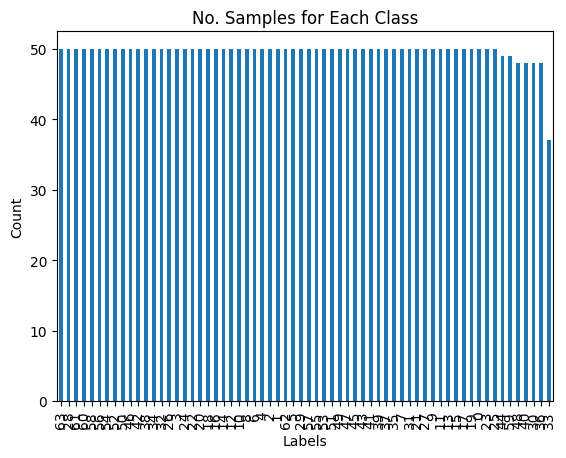

Num values for body parts: 6342624
Num Nan values for body parts: 176850
Num values for hand parts: 22199184
Num Nan values for hand parts: 9381632
Percentage of zero values for body parts: 0.03%
Percentage of zero values for hand parts: 0.42%


In [195]:
calculate_and_print_stats('D:\Spoter_transformer_SLR\datasets\LSA64_60fps.csv')

# WLASL100

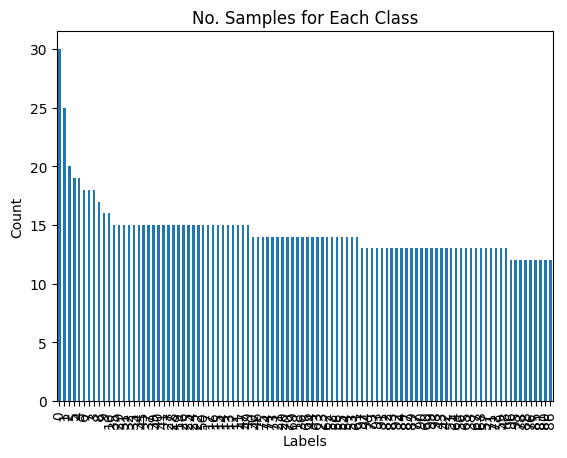

Num values for body parts: 2138400
Num Nan values for body parts: 159320
Num values for hand parts: 7484400
Num Nan values for hand parts: 3811046
Percentage of zero values for body parts: 0.07%
Percentage of zero values for hand parts: 0.51%


In [196]:
calculate_and_print_stats('D:\Spoter_transformer_SLR\datasets\WLASL100_train_25fps.csv')

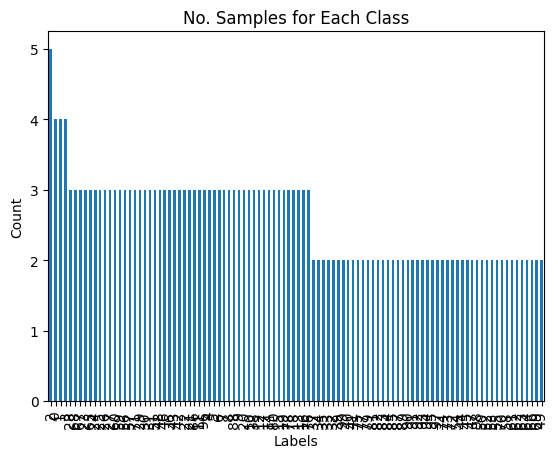

Num values for body parts: 375360
Num Nan values for body parts: 29060
Num values for hand parts: 1313760
Num Nan values for hand parts: 612046
Percentage of zero values for body parts: 0.08%
Percentage of zero values for hand parts: 0.47%


In [197]:
calculate_and_print_stats('D:\Spoter_transformer_SLR\datasets\WLASL100_test_25fps.csv')

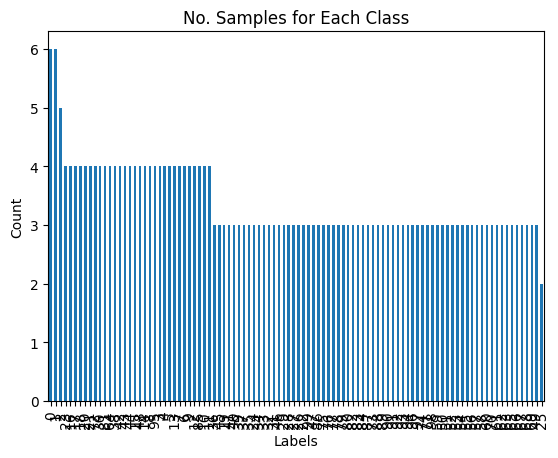

Num values for body parts: 515640
Num Nan values for body parts: 42498
Num values for hand parts: 1804740
Num Nan values for hand parts: 941690
Percentage of zero values for body parts: 0.08%
Percentage of zero values for hand parts: 0.52%


In [199]:
calculate_and_print_stats('D:\Spoter_transformer_SLR\datasets\WLASL100_val_25fps.csv')

## Overall

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

WLASL100_train = pd.read_csv('D:\Spoter_transformer_SLR\datasets\WLASL100_train_25fps.csv')
WLASL100_test = pd.read_csv('D:\Spoter_transformer_SLR\datasets\WLASL100_test_25fps.csv')
WLASL100_val = pd.read_csv('D:\Spoter_transformer_SLR\datasets\WLASL100_val_25fps.csv')

In [3]:
WLASL100 = pd.concat([WLASL100_train, WLASL100_test, WLASL100_val], ignore_index=True)

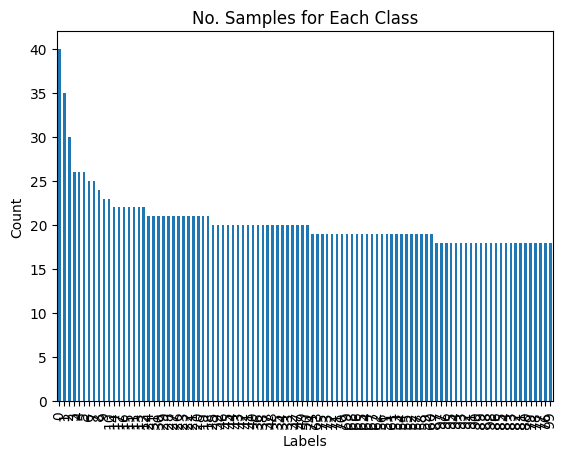

Num values for body parts: 3029400
Num Nan values for body parts: 230878
Num values for hand parts: 10602900
Num Nan values for hand parts: 5364782
Percentage of zero values for body parts: 0.08%
Percentage of zero values for hand parts: 0.51%


In [16]:
calculate_and_print_stats(None, WLASL100)

# KAGGLE250

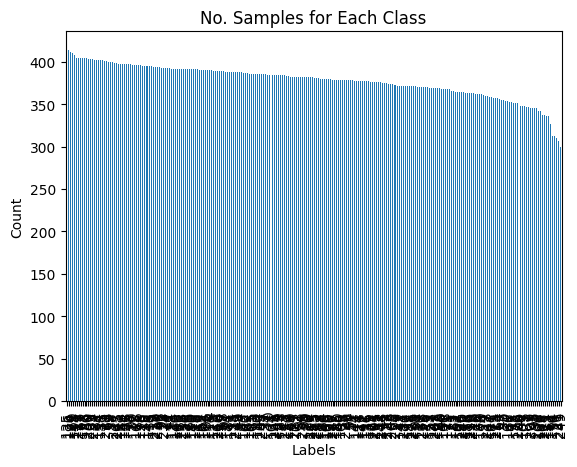

Num values for body parts: 86015688
Num Nan values for body parts: 0
Num values for hand parts: 301054908
Num Nan values for hand parts: 208874484
Percentage of zero values for body parts: 0.00%
Percentage of zero values for hand parts: 0.69%


In [198]:
calculate_and_print_stats('D:\Spoter_transformer_SLR\datasets\KAGGLE250_ASL.csv')